In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
import nltk

In [2]:
# Load files 2018,2019,2020 and 2021
da18 = pd.read_excel('2018.xlsx')
da19 = pd.read_excel('2019.xlsx')
da20 = pd.read_excel('2020.xlsx')
da21 = pd.read_excel('2021.xlsx')

In [3]:
# Format date type
da18['End Date'] = pd.to_datetime(da18['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da19['End Date'] = pd.to_datetime(da19['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da20['End Date'] = pd.to_datetime(da20['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da21['End Date'] = pd.to_datetime(da21['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)

In [4]:
# Rename conductor feedback
da18.rename(columns = {'Are there any other comments you would like to make about the value of the Choir to you?':'conductorfeedback'},inplace = True)
da19.rename(columns = {'3.Is there anything that you particularly like about the choir?':'conductorfeedback'},inplace = True)
da20.rename(columns = {'Do you have any feedback for us about our live sessions?':'conductorfeedback'},inplace = True)
da21.rename(columns = {'9. What is the best thing about the choir? ___________':'conductorfeedback'},inplace = True)

In [5]:
da18_clean = da18['conductorfeedback'].dropna()

In [6]:
da18_clean = da18_clean.reset_index()
da18_clean = da18_clean.drop(columns=['index'])

In [7]:
# 4.Topic modelling
from nltk.stem import PorterStemmer
import re

In [8]:
#Data Cleaning by removing punctuations, numbers, special characters, and short words
documents = da18_clean['conductorfeedback']
Cleaned_doc = []
for r in range(len(documents)):
    tweet = documents[r]
    try:
        tweet = re.sub('[^A-Za-z]', ' ', tweet) #removing everything except alphabets
        tweet = tweet.lower() #lowercase
        Tokens = tweet.split() #tokenization
        Filtered_token = [w for w in Tokens if len(w)>3] # removing short words
        tweet = ' '.join(Filtered_token) 
    except:
        continue
#Save cleaned text
    Cleaned_doc.append(tweet) 
    print('-[Tweet Text]: ', tweet)

-[Tweet Text]:  nothing particular though worth reiterating much have choir rehearsals gigs which honest probably mostly down conductor dillon hilarious entertaining watch just makes worthwhile practise every week probably worth mentioning that when first joined choir those months people often asked joined used always ething like because singing makes happy believe singing releases endorphins room full other people singing same song just getting right feels good make feel happy rest week
-[Tweet Text]:  lydia been best things happen whole time been attending value nicki lydia anthony immeasurable they should trusted completely their roles very much respect appreciate what tania achieve with this program working believe could work even better something that frustrates disappoints within individual choirs spirit unity friendship inclusion present however often feel tania talks talk doesn walk sure diplomacy here wish offend feedback hope will constructive times found tania rude behind sc

In [9]:
#Remove the stop-words from the text data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = ['https','because','please','very','thank','call','watch','look','today','something','someone',
 'anyone','anything','everyone','everything','thanks','care','thing','doesn','things']
# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
            each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item) 
    print('-[Cleaned Text]: ', Cleaned_doc[r])

-[Cleaned Text]:  nothing particular though worth reiterating much have choir rehearsals gigs which honest probably mostly down conductor dillon hilarious entertaining just makes worthwhile practise every week probably worth mentioning that when first joined choir those months people often asked joined used always ething like singing makes happy believe singing releases endorphins room full other people singing same song just getting right feels good make feel happy rest week
-[Cleaned Text]:  lydia been best happen whole time been attending value nicki lydia anthony immeasurable they should trusted completely their roles much respect appreciate what tania achieve with this program working believe could work even better that frustrates disappoints within individual choirs spirit unity friendship inclusion present however often feel tania talks talk walk sure diplomacy here wish offend feedback hope will constructive times found tania rude behind scenes genuine while lights tania were c

In [10]:
#Select only nouns
Cleaned_doc_noun = Cleaned_doc
for r in range(len(Cleaned_doc_noun)):
    lines = Cleaned_doc[r]
# function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'
 # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    Cleaned_doc_noun[r] = ' '.join(nouns) 
    print('-[Cleaned Text Noun]: ', Cleaned_doc_noun[r])

-[Cleaned Text Noun]:  nothing rehearsals gigs conductor dillon practise week choir months people joined believe releases room people song feels rest week
-[Cleaned Text Noun]:  time value anthony roles tania program believe disappoints choirs spirit unity friendship inclusion talks diplomacy feedback hope times scenes lights tania appreciation choir members times stage group respect conductors position members example stage tania friend hers person tania friends person disability caution people story stories wealthy people strings money balance people resentment ashburton life opportunity support feel
-[Cleaned Text Noun]:  people conductors
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  note volunteers attendees visitors information voice pasme payment membership fees information attendees circumstances professional responsibility individuals confidentiality volunteers areas community members acceptance choir community choir attendees contribution nothing
-[Cleaned Text Noun]:  surve

In [11]:
# 4.2 Term document matrix

In [12]:
#Fit and transform the processed titles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer() 
count_data = count_vectorizer.fit_transform(Cleaned_doc_noun)
count_data

<60x247 sparse matrix of type '<class 'numpy.int64'>'
	with 365 stored elements in Compressed Sparse Row format>

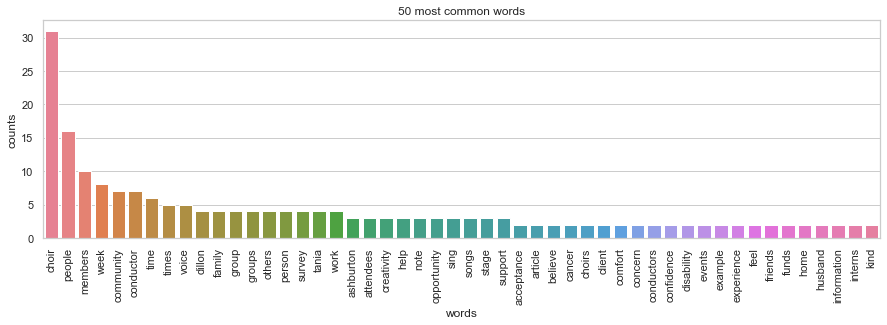

In [13]:
#Visualise most common words
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

terms = count_vectorizer.get_feature_names()
# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]
count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words
 
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
 
plt.figure(2, figsize=(15, 4))
plt.subplot(title='50 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [14]:
# 4.3/ Term selection

In [15]:
#Remove highly frequent as from above graph and infrequent words from the Dataset
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 30 and total_counts[t] > 1:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  64


<60x64 sparse matrix of type '<class 'numpy.int64'>'
	with 160 stored elements in Compressed Sparse Row format>

In [16]:
#4.4. Topic number

In [17]:
#Install Gensim package
!pip install Cython
!pip install gensim

In [18]:
#Data Preparation
Cleaned_doc_noun_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc_noun)):
    each_item = []
    for t in Cleaned_doc_noun[r].split():
 #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
            each_item.append(t)
    Cleaned_doc_noun_new.append(each_item) 
    print(Cleaned_doc_noun_new[r])

CLEANED TEXT NEW: 
['nothing', 'rehearsals', 'conductor', 'dillon', 'week', 'months', 'people', 'believe', 'people', 'week']
['time', 'value', 'tania', 'program', 'believe', 'choirs', 'times', 'tania', 'members', 'times', 'stage', 'group', 'conductors', 'members', 'example', 'stage', 'tania', 'person', 'tania', 'friends', 'person', 'disability', 'people', 'people', 'people', 'ashburton', 'life', 'opportunity', 'support', 'feel']
['people', 'conductors']
[]
['note', 'volunteers', 'attendees', 'information', 'voice', 'information', 'attendees', 'volunteers', 'community', 'members', 'acceptance', 'community', 'attendees', 'nothing']
['survey']
[]
[]
['home']
[]
['people', 'people', 'home']
['voice', 'kind', 'community']
['week', 'people', 'family']
['stage', 'survey']
['comfort', 'confidence', 'comfort', 'confidence', 'creativity']
['members']
[]
['conductor', 'kind']
['ashburton']
['dillon']
['friends', 'opportunity']
[]
['times', 'experience', 'people', 'others', 'others', 'conductor', 

In [19]:
import gensim.corpora as corpora
# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_noun_new)
print(id2word.token2id)

{'believe': 0, 'conductor': 1, 'dillon': 2, 'months': 3, 'nothing': 4, 'people': 5, 'rehearsals': 6, 'week': 7, 'ashburton': 8, 'choirs': 9, 'conductors': 10, 'disability': 11, 'example': 12, 'feel': 13, 'friends': 14, 'group': 15, 'life': 16, 'members': 17, 'opportunity': 18, 'person': 19, 'program': 20, 'stage': 21, 'support': 22, 'tania': 23, 'time': 24, 'times': 25, 'value': 26, 'acceptance': 27, 'attendees': 28, 'community': 29, 'information': 30, 'note': 31, 'voice': 32, 'volunteers': 33, 'survey': 34, 'home': 35, 'kind': 36, 'family': 37, 'comfort': 38, 'confidence': 39, 'creativity': 40, 'events': 41, 'experience': 42, 'groups': 43, 'others': 44, 'work': 45, 'funds': 46, 'help': 47, 'sing': 48, 'website': 49, 'cancer': 50, 'wouldn': 51, 'husband': 52, 'concern': 53, 'skills': 54, 'client': 55, 'article': 56, 'interns': 57, 'leader': 58, 'volunteer': 59, 'year': 60, 'years': 61, 'songs': 62, 'nights': 63}


In [20]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_noun_new]
print(Corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2)], [(0, 1), (5, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 2), (20, 1), (21, 2), (22, 1), (23, 4), (24, 1), (25, 2), (26, 1)], [(5, 1), (10, 1)], [], [(4, 1), (17, 1), (27, 1), (28, 3), (29, 2), (30, 2), (31, 1), (32, 1), (33, 2)], [(34, 1)], [], [], [(35, 1)], [], [(5, 2), (35, 1)], [(29, 1), (32, 1), (36, 1)], [(5, 1), (7, 1), (37, 1)], [(21, 1), (34, 1)], [(38, 2), (39, 2), (40, 1)], [(17, 1)], [], [(1, 1), (36, 1)], [(8, 1)], [(2, 1)], [(14, 1), (18, 1)], [], [(1, 1), (5, 1), (25, 2), (41, 1), (42, 2), (43, 1), (44, 3), (45, 2)], [(7, 1), (45, 1)], [(1, 1), (3, 1), (5, 1), (7, 1), (12, 1), (15, 3), (18, 1), (20, 1), (22, 1), (24, 1), (25, 1), (29, 2), (31, 1), (32, 1), (40, 2), (43, 3), (46, 2), (47, 3), (48, 1), (49, 1)], [(19, 1)], [(50, 1)], [(51, 1)], [(5, 1), (29, 1), (41, 1), (52, 1)], [(48, 1)], [], [], [(37, 2)], [], [(32, 1)], [(45, 1)], [(17, 2), 

In [21]:
#Gensim LDA Model
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint
#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=15,
random_state=100)
#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.129*"family" + 0.129*"week" + 0.129*"community" + 0.129*"ashburton" + '
  '0.008*"conductor" + 0.008*"people" + 0.008*"work" + 0.008*"members" + '
  '0.008*"person" + 0.008*"dillon"'),
 (1,
  '0.115*"others" + 0.115*"time" + 0.115*"life" + 0.115*"week" + 0.115*"work" '
  '+ 0.007*"conductor" + 0.007*"people" + 0.007*"person" + 0.007*"ashburton" + '
  '0.007*"home"'),
 (2,
  '0.159*"others" + 0.107*"experience" + 0.107*"times" + 0.107*"work" + '
  '0.107*"conductor" + 0.055*"events" + 0.055*"groups" + 0.055*"people" + '
  '0.055*"kind" + 0.003*"survey"'),
 (3,
  '0.361*"members" + 0.183*"concern" + 0.095*"leader" + 0.006*"conductor" + '
  '0.006*"people" + 0.006*"sing" + 0.006*"survey" + 0.006*"week" + '
  '0.006*"ashburton" + 0.006*"person"'),
 (4,
  '0.107*"time" + 0.107*"songs" + 0.107*"skills" + 0.107*"family" + '
  '0.055*"members" + 0.055*"acceptance" + 0.055*"person" + 0.055*"week" + '
  '0.055*"nights" + 0.055*"people"'),
 (5,
  '0.147*"community" + 0.147*"voice" + 0.1

In [ ]:
#Compute topic coherence sore
from gensim.models import CoherenceModel
# Compute Coherence Score. Note: that CoherenceModel require 
# text input format (Cleaned_doc_new) instead of bag of word 
coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
#Experiment with Topic Numbers
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,16,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
 lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=top,
random_state=100)
 #Keep the trained models
 Trained_Models.append(lda_model)
 #Compute coherence score for each model
 coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
 coherence = coherence_model_lda.get_coherence()
 #Save and print the coherence scores 
 coherence_scores.append(coherence)
 print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

In [ ]:
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

In [ ]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]
#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

In [ ]:
#4.5/ LDA Model
#Train LDA Model with 12 topics
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Tweak the two parameters below
number_topics = 12
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

In [ ]:
#Word Probablities by Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

In [ ]:
#Extract and view the top words in each topic
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))

In [ ]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
 count_dict = (zip(ReducedTerm, topic))
 count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
 # convert to dictionary type - keep top 10 words
 Word_Frequency = dict(count_dict[0:10])
 # generate word cloud
 wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
 # visualize word cloud in figure
 subfig_Row = math.floor(topic_idx/4)
 subfig_Col = math.ceil(topic_idx%4)
 ax[subfig_Row,subfig_Col].imshow(wordcloud)
 ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1)) 
plt.show() 

In [ ]:
!pip install gensim
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
###Visualize topics-keywords of LDA###
# To plot at Jupyter notebook
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
plot = pyLDAvis.gensim_models.prepare(lda_model, Corpus, dictionary= id2word)

